# Data Analysis
This notebook is meant for exploritory analysis and in depth analysis of data on reddit users. Note: comments are not studied in this notebook because they are not central to the research (outside of determining pagerank) and they take a very long time to load.

## Setup

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [37]:
# Configurable constants
subreddit = "justwriterthings"
download_date_string = "19.12.04-10:30:56"

data_directory = "data/"

# Derived constants
submissions_file = data_directory + subreddit + "-augmented-submissions-" + download_date_string + ".csv"
users_file = data_directory + subreddit + "-users-" + download_date_string + ".csv"

## Read Data

In [38]:
submissions = pd.read_csv(submissions_file, index_col=0)
submissions.head()

,index,submission_id,user,utc,score,title,body,subreddit,date,content,word_p_dist,entropy,novelty,transience,novelty_5,transience_5,impact,impact_5
0,596,7zdxwf,AliceTheGamedev,1.519295e+09,36,Everyone struggles with the same things,NaN,justwriterthings,2018-02-22 10:23:10,Everyone struggles with the same things,"{'Everyone': 0.16666666666666666, 'struggles':...",2.584963,NaN,10.692065,NaN,10.150106,NaN,NaN
1,595,7zdy3a,AliceTheGamedev,1.519295e+09,47,gotta find your motivation somewhere,NaN,justwriterthings,2018-02-22 10:24:24,gotta find your motivation somewhere,"{'gotta': 0.2, 'find': 0.2, 'your': 0.2, 'moti...",2.321928,10.952647,10.952647,NaN,10.430116,0.000000,NaN
2,594,7zdy73,AliceTheGamedev,1.519295e+09,38,I remembered that sounding better somehow...,NaN,justwriterthings,2018-02-22 10:25:10,I remembered that sounding better somehow...,"{'I': 0.16666666666666666, 'remembered': 0.166...",2.584963,10.692065,10.685683,NaN,9.468108,0.006383,NaN
3,593,7zf09y,AliceTheGamedev,1.519307e+09,24,This is definitely how you fix plot holes,NaN,justwriterthings,2018-02-22 13:51:36,This is definitely how you fix plot holes,"{'This': 0.125, 'is': 0.125, 'definitely': 0.1...",3.000000,10.275414,10.277523,NaN,10.065554,-0.002109,NaN
4,592,7zf0df,AliceTheGamedev,1.519308e+09,18,Authors are such romantic people...,NaN,justwriterthings,2018-02-22 13:52:10,Authors are such romantic people...,"{'Authors': 0.2, 'are': 0.2, 'such': 0.2, 'rom...",2.321928,10.948363,10.770764,NaN,10.918477,0.177599,NaN


In [39]:
# a version of submissions without nan or infinite values
safe_submissions = submissions \
    .drop('body', axis=1) \
    .replace(np.inf, np.nan) \
    .replace(-np.inf, np.nan) \
    .dropna()

In [40]:
users = pd.read_csv(users_file, index_col=0)
users.head()

,num_posts,max_score_submissions,mean_score_submissions,min_score_submissions,mean_length_submissions,mean_impact,mean_novelty,mean_transience,mean_impact_5,mean_novelty_5,mean_transience_5,num_comments,max_score_comments,mean_score_comments,min_score_comments,mean_length_comments,pagerank
user,,,,,,,,,,,,,,,,,
--__uwu__--,1.0,36.0,36.0,36.0,356.0,0.159479,7.831459,7.671980,-0.312901,7.156295,7.469196,NaN,NaN,NaN,NaN,NaN,0.003847
-Rapier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,14.0,14.0,14.0,200.0,0.000596
17x17x17RubixCube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,4.0,4.0,67.0,0.000596
19Codamadaco98,1.0,54.0,54.0,54.0,29.0,0.023162,10.957031,10.933869,0.010165,10.956246,10.946081,NaN,NaN,NaN,NaN,NaN,0.001644
762Rifleman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,3.0,3.0,480.0,0.000596


In [41]:
# a last minute adjustment
users['ln_pagerank'] = users['pagerank'].apply(np.log)
users['ln_num_posts'] = users['num_posts'].apply(np.log)
users['ln_mean_length_submissions'] = users['mean_length_submissions'].apply(np.log)
users['ln_mean_score_submissions'] = users['mean_score_submissions'].apply(np.log)

In [42]:
# a version of users without nans (removes a lot of comment info)
safe_users = users \
    .drop('num_comments', axis=1) \
    .drop('max_score_comments', axis=1) \
    .drop('mean_score_comments', axis=1) \
    .drop('min_score_comments', axis=1) \
    .drop('mean_length_comments', axis=1) \
    .dropna()
safe_users = safe_users[np.isfinite(safe_users).all(1)] # drop infinites as well

## Exploritory Data Analysis
Lets get a feel for the data

### Exploring Submissions

#### Simple Histograms

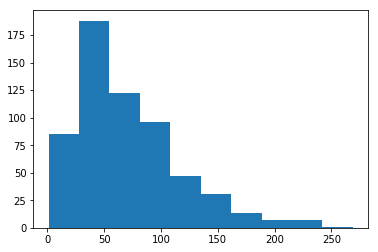

In [43]:
plt.hist(submissions['score'])
plt.show()

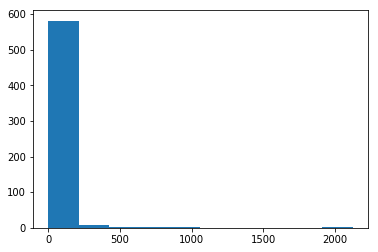

In [44]:
plt.hist(submissions['content'].apply(len))
plt.show()

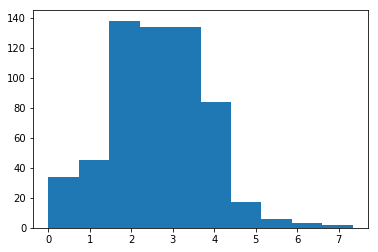

In [45]:
plt.hist(submissions['entropy'])
plt.show()

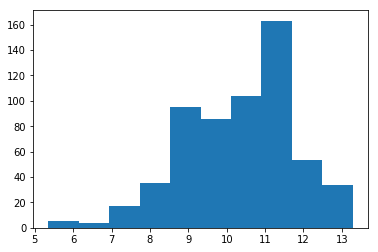

In [46]:
plt.hist(submissions['novelty'])
plt.show()

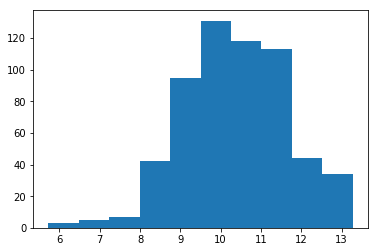

In [47]:
plt.hist(submissions['novelty_5'])
plt.show()

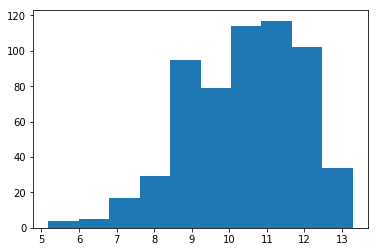

In [48]:
plt.hist(submissions['transience'])
plt.show()

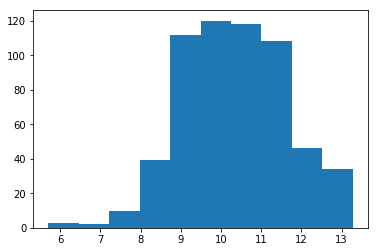

In [49]:
plt.hist(submissions['transience_5'])
plt.show()

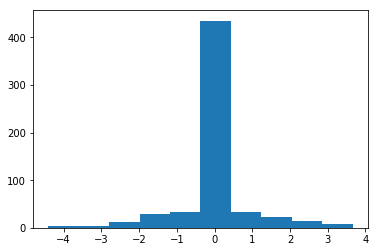

In [50]:
plt.hist(submissions['impact'])
plt.show()

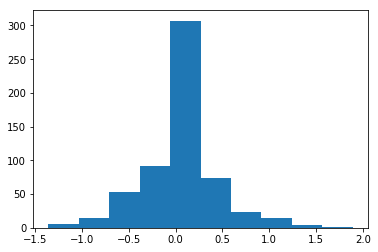

In [51]:
plt.hist(submissions['impact_5'])
plt.show()

#### Submission Scatterplots

slope: -0.054058171923393364
intercept: 74.42661507934636
r: -0.16804495112098497
r-squared: 0.02823910559725423
standard error: 0.01320163402097779


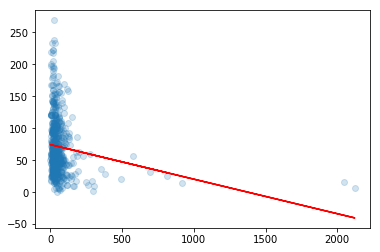

In [52]:
# scatterplot
x = safe_submissions['content'].apply(len)
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

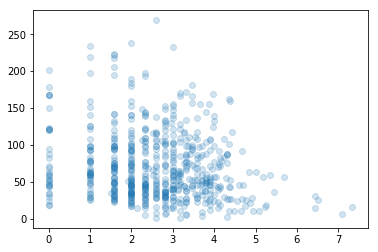

In [53]:
plt.scatter(x=submissions['entropy'], y=submissions['score'], alpha=0.2)

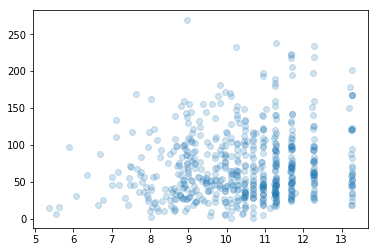

In [54]:
plt.scatter(x=submissions['novelty'], y=submissions['score'], alpha=0.2)
plt.show()

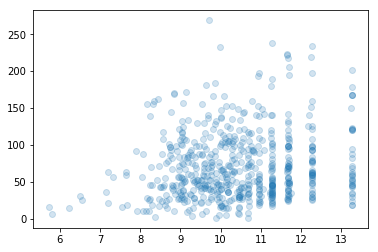

In [55]:
plt.scatter(x=submissions['novelty_5'], y=submissions['score'], alpha=0.2)
plt.show()

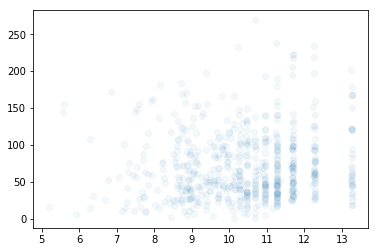

In [56]:
plt.scatter(x=submissions['transience'], y=submissions['score'], alpha=0.05)
plt.show()

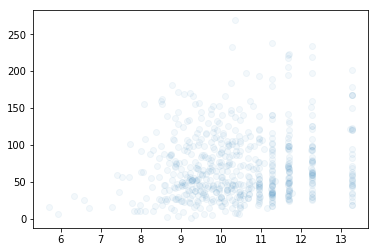

In [57]:
plt.scatter(x=submissions['transience_5'], y=submissions['score'], alpha=0.05)
plt.show()

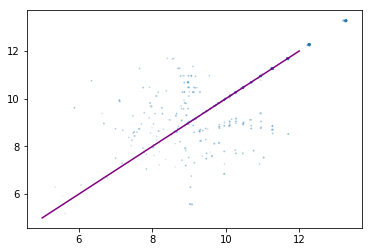

In [58]:
# novelty-transcience plot
plt.scatter(x=submissions['novelty'], y=submissions['transience'], s=submissions['score'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(5, 13)
plt.plot(domain, domain, color='purple')

plt.show()

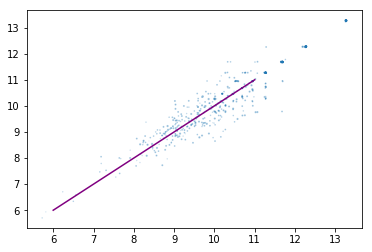

In [59]:
# novelty-transcience plot
plt.scatter(x=submissions['novelty_5'], y=submissions['transience_5'], s=submissions['score'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(6, 12)
plt.plot(domain, domain, color='purple')

plt.show()

slope: 4.480373239189656
intercept: 71.12016140788059
r: 0.09267034518507401
r-squared: 0.008587792876720771
standard error: 2.0040688527643225


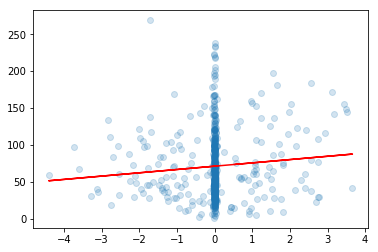

In [60]:
# scatterplot
x = safe_submissions['impact']
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

slope: 3.1032655933069004
intercept: 71.08240876296293
r: 0.026745047797361955
r-squared: 0.0007152975816831755
standard error: 4.828722867641911


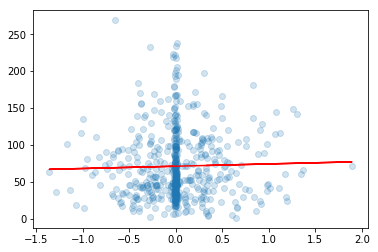

In [61]:
# scatterplot
x = safe_submissions['impact_5']
y = safe_submissions['score']
plt.scatter(x, y, alpha=0.2)

# best fit line
m, b, r, p, std_err = stats.linregress(x, y)
print("slope: " + str(m))
print("intercept: " + str(b))
print("r: " + str(r))
print("r-squared: " + str(r**2))
print("standard error: " + str(std_err))
plt.plot(x, b + m * x, color="red")

plt.show()

### Exploring Users

#### Simple Histograms

In [62]:
# helper to make this less redundant
def user_hist(column_name):
    plt.hist(users[column_name])
    plt.title("users " + column_name)
    plt.show()

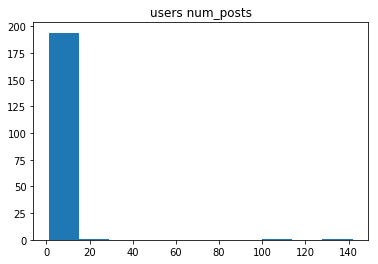

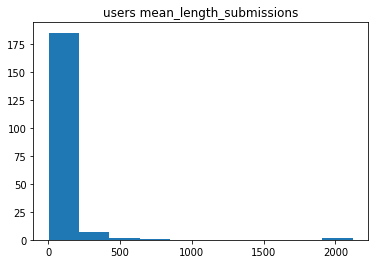

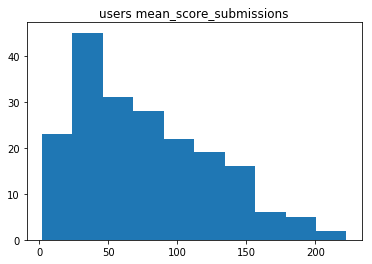

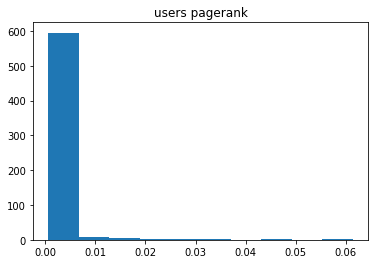

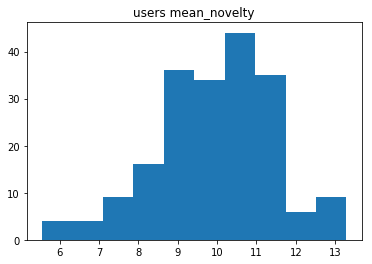

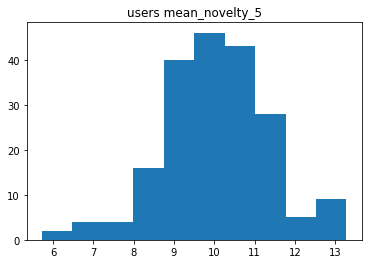

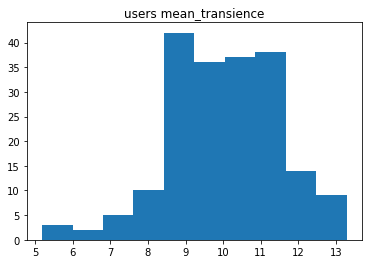

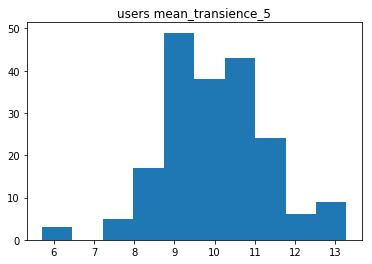

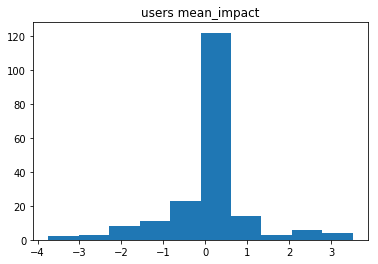

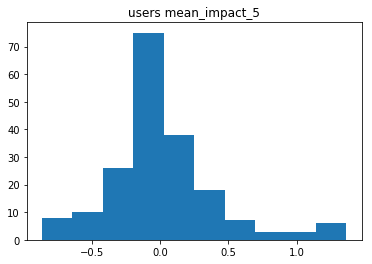

In [63]:
user_hist('num_posts')
user_hist('mean_length_submissions')
user_hist('mean_score_submissions')
user_hist('pagerank')
user_hist('mean_novelty')
user_hist('mean_novelty_5')
user_hist('mean_transience')
user_hist('mean_transience_5')
user_hist('mean_impact')
user_hist('mean_impact_5')

#### User Scatterplots

In [64]:
# a scatterplot and regression helper function
def user_scatter(x_col, y_col, alpha=0.2):
    x = safe_users[x_col]
    y = safe_users[y_col]
    
    # scatterplot
    plt.scatter(x, y, alpha=alpha)

    # best fit line
    m, b, r, p, std_err = stats.linregress(x, y)
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print("slope: " + str(m))
    print("intercept: " + str(b))
    print("r: " + str(r))
    print("r-squared: " + str(r**2))
    print("p: " + str(p))
    print("standard error: " + str(std_err))
    plt.plot(x, b + m * x, color="red")
    plt.title("users " + y_col + " vs " + x_col)

    plt.show()

In [65]:
safe_users.columns

Index(['num_posts', 'max_score_submissions', 'mean_score_submissions',
       'min_score_submissions', 'mean_length_submissions', 'mean_impact',
       'mean_novelty', 'mean_transience', 'mean_impact_5', 'mean_novelty_5',
       'mean_transience_5', 'pagerank', 'ln_pagerank', 'ln_num_posts',
       'ln_mean_length_submissions', 'ln_mean_score_submissions'],
      dtype='object')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.00040824956084438993
intercept: 0.0025545067711419457
r: 0.7153970843727224
r-squared: 0.5117929883289921
p: 1.02106141900697e-31
standard error: 2.877596869198438e-05


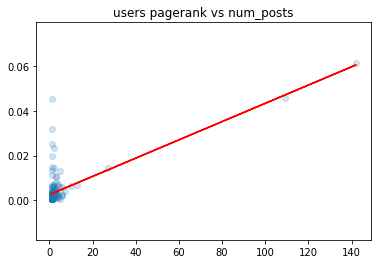

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 1.89991631919148e-05
intercept: 0.0023337808672466544
r: 0.12668586419189218
r-squared: 0.016049308186046548
p: 0.07836955153866831
standard error: 1.0735996670351767e-05


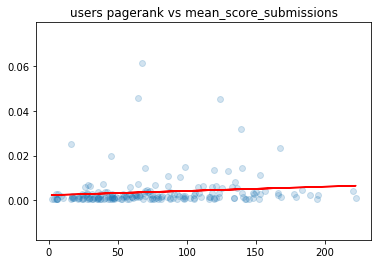

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 3.4062720402603857e-06
intercept: 0.0034797185139734364
r: 0.10333032842000674
r-squared: 0.010677156771386451
p: 0.1516394115740293
standard error: 2.3663006559828556e-06


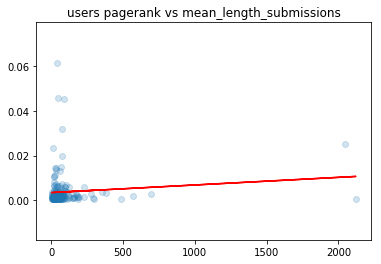

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.00015575131484113933
intercept: 0.005342296556578817
r: -0.03250971047478295
r-squared: 0.0010568812751542125
p: 0.6527100167684241
standard error: 0.0003455718717363086


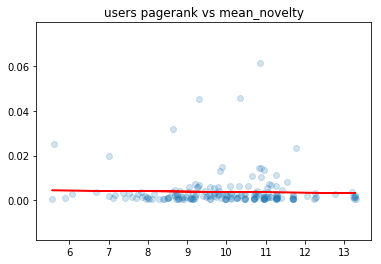

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.0002925576131010879
intercept: 0.006731562983667622
r: -0.05430222687719223
r-squared: 0.0029487318438220582
p: 0.45204521011146126
standard error: 0.00038824144515869257


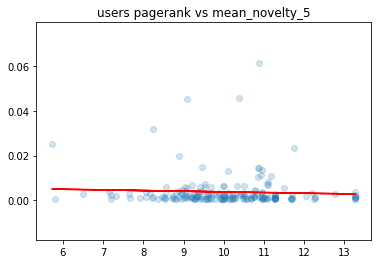

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.00020279051864629616
intercept: 0.0058139116096291975
r: -0.0412922305411034
r-squared: 0.001705048303059632
p: 0.5675514435180578
standard error: 0.0003541262541890344


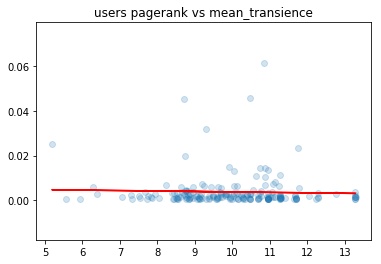

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.0002178482034623614
intercept: 0.005970659862074311
r: -0.039901787809460375
r-squared: 0.0015921526703912006
p: 0.5806770576217042
standard error: 0.00039369962991528103


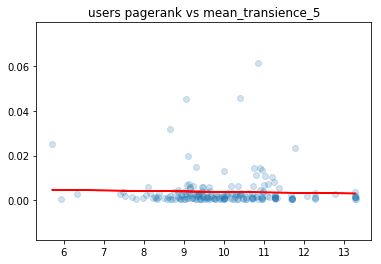

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 8.428589801531329e-05
intercept: 0.0037885444741952625
r: 0.011671855645487247
r-squared: 0.00013623221420909251
p: 0.8716798976046812
standard error: 0.000521116484965716


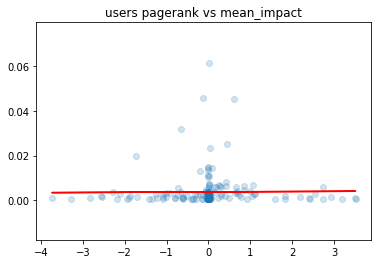

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.0009935357120759525
intercept: 0.0038285978647361915
r: -0.0526233653198568
r-squared: 0.0027692185775871074
p: 0.46616864336185804
standard error: 0.001360667737025554


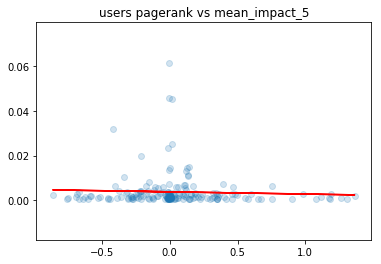

In [66]:
user_scatter('num_posts', 'pagerank')
user_scatter('mean_score_submissions', 'pagerank')
user_scatter('mean_length_submissions', 'pagerank')
user_scatter('mean_novelty', 'pagerank')
user_scatter('mean_novelty_5', 'pagerank')
user_scatter('mean_transience', 'pagerank')
user_scatter('mean_transience_5', 'pagerank')
user_scatter('mean_impact', 'pagerank')
user_scatter('mean_impact_5', 'pagerank')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.674630100244532
intercept: -6.47209190156702
r: 0.4993801882035058
r-squared: 0.2493805723701689
p: 1.244789890536479e-13
standard error: 0.08446828793619704


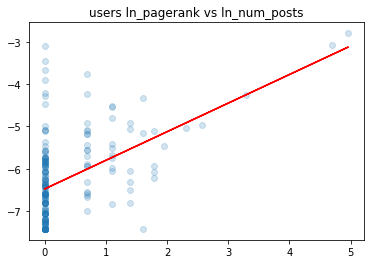

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.31680301764249363
intercept: -7.535637079490378
r: 0.26662441636418716
r-squared: 0.07108857940154344
p: 0.00017134214204627053
standard error: 0.08264677830096621


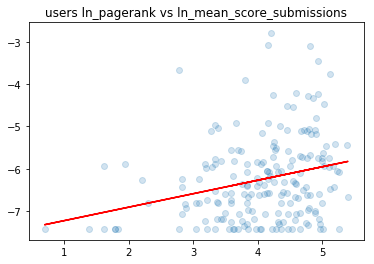

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.11453579033047973
intercept: -6.685599300904501
r: 0.11318690364510073
r-squared: 0.012811275156765316
p: 0.11609512621318495
standard error: 0.07255953925272954


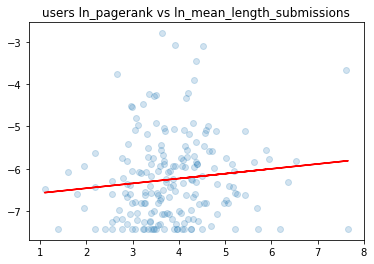

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.026962395508455177
intercept: -5.977215230530856
r: -0.04143151857376896
r-squared: 0.0017165707313285625
p: 0.5662443876073591
standard error: 0.046924963141252364


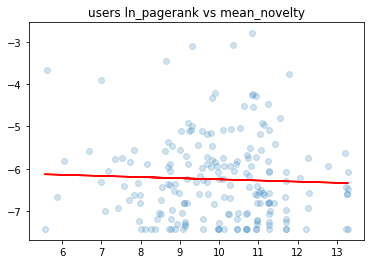

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.0567273066545648
intercept: -5.67551481575678
r: -0.07751565061800197
r-squared: 0.00600867609073215
p: 0.2826846342968894
standard error: 0.052655464732010715


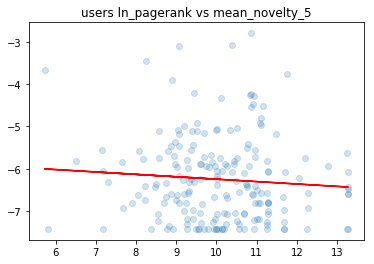

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.042382043170803164
intercept: -5.822866835208036
r: -0.06353215451154144
r-squared: 0.004036334656878375
p: 0.37882065957596744
standard error: 0.04804624362875658


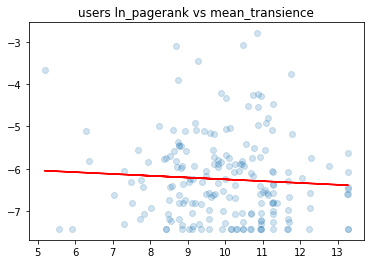

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.04128159138572059
intercept: -5.832669397234163
r: -0.05566545961366907
r-squared: 0.003098643394001022
p: 0.4407557947274515
standard error: 0.05343749736662583


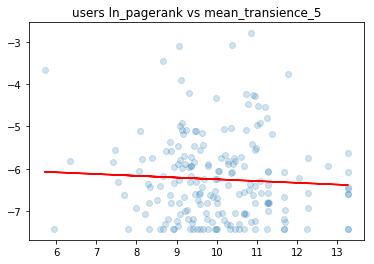

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: 0.030358394925257694
intercept: -6.2460250668605575
r: 0.030949582301302243
r-squared: 0.000957876644625081
p: 0.6683638407480237
standard error: 0.07075633018160209


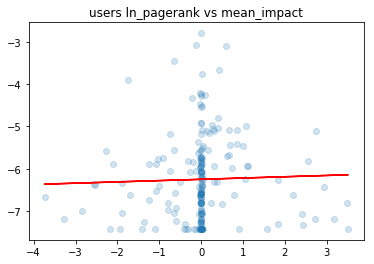

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
slope: -0.1945792722505062
intercept: -6.2383240211198885
r: -0.07587220526397066
r-squared: 0.005756591531618098
p: 0.2930452909626646
standard error: 0.18454811489901543


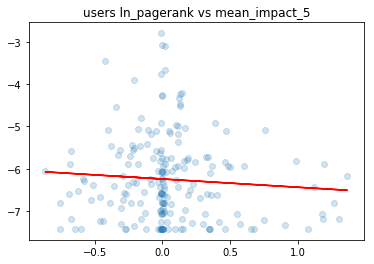

In [67]:
user_scatter('ln_num_posts', 'ln_pagerank')
user_scatter('ln_mean_score_submissions', 'ln_pagerank')
user_scatter('ln_mean_length_submissions', 'ln_pagerank')
user_scatter('mean_novelty', 'ln_pagerank')
user_scatter('mean_novelty_5', 'ln_pagerank')
user_scatter('mean_transience', 'ln_pagerank')
user_scatter('mean_transience_5', 'ln_pagerank')
user_scatter('mean_impact', 'ln_pagerank')
user_scatter('mean_impact_5', 'ln_pagerank')

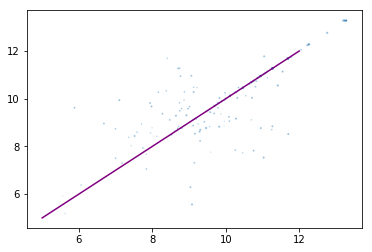

In [68]:
# novelty-transcience plot
plt.scatter(x=users['mean_novelty'], y=users['mean_transience'], s=users['mean_score_submissions'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(5, 13)
plt.plot(domain, domain, color='purple')

plt.show()

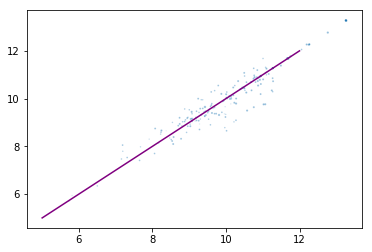

In [69]:
# novelty-transcience plot
plt.scatter(x=users['mean_novelty_5'], y=users['mean_transience_5'], s=users['mean_score_submissions'] / 100, alpha=0.3)

# add line of equality
domain = np.arange(5, 13)
plt.plot(domain, domain, color='purple')

plt.show()